In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [54]:
df_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_IN = df_IN.dropna(subset=['salary_year_avg'])
df_IN_exploded = df_IN.explode('job_skills')

df_IN_new = df_IN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

job_total = len(df_IN_new)

df_IN_new['Skills Percentage'] = df_IN_new['count'] / job_total * 100

df_IN_top = df_IN_new[df_IN_new['Skills Percentage'] > 14]

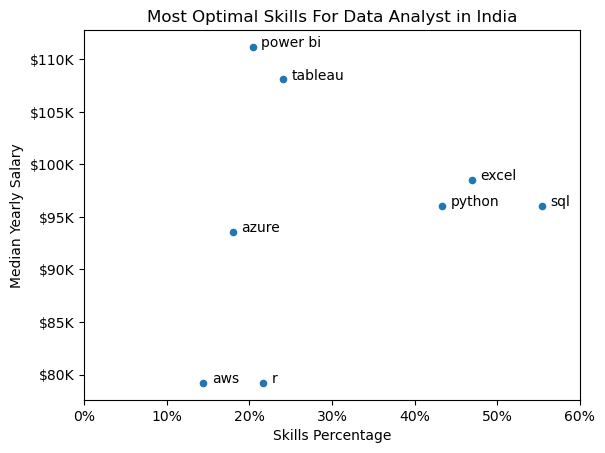

In [56]:

df_IN_top.plot(kind='scatter',x='Skills Percentage', y='median')

texts = []
for i,text in enumerate(df_IN_top.index):
    texts.append(plt.text(df_IN_top['Skills Percentage'].iloc[i]+1,df_IN_top['median'].iloc[i],text))

ax = plt.gca()
ax.set_ylabel('Median Yearly Salary')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.set_xlim(0,60)

plt.title('Most Optimal Skills For Data Analyst in India')
plt.show()
